# 고양이 수염 스티커 만들기

In [855]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.1.2
19.18.0


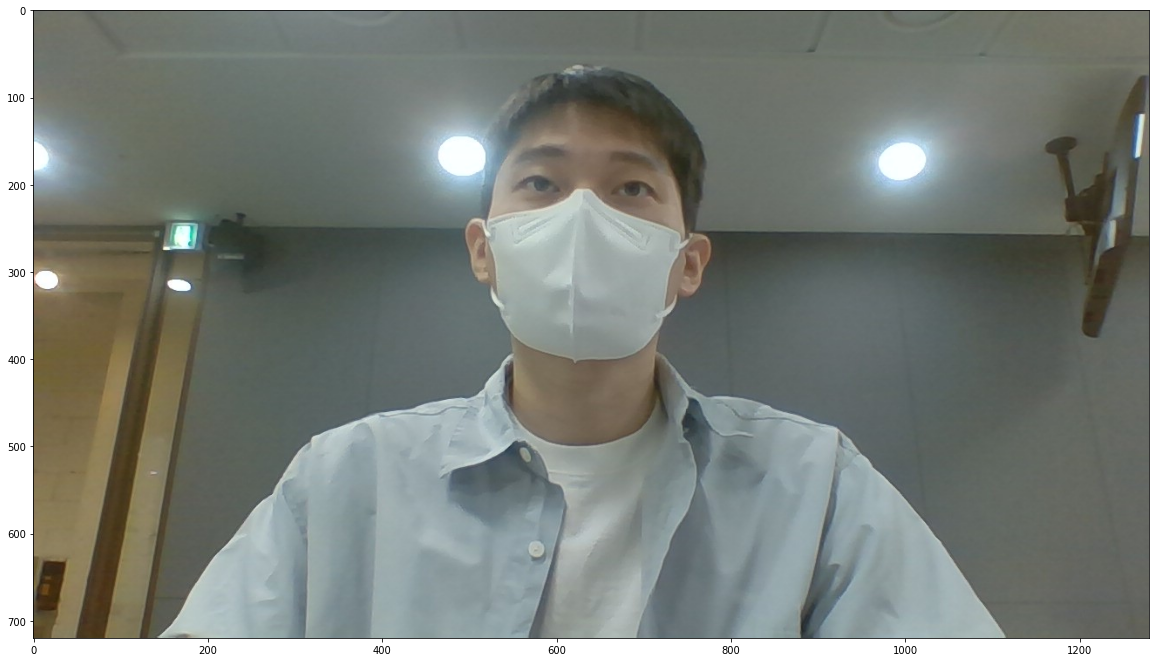

In [856]:
# 이미지 불러오기
img_path = '/content/drive/MyDrive/AIFFEL/Exp/08/data/selfie.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_show = img.copy()      # 출력용 이미지 백업

plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()



### Step 1. 스티커 구하기 or 만들기



In [857]:
sticker_path = '/content/drive/MyDrive/AIFFEL/Exp/08/data/cat-whiskers.png'



### Step 2. 얼굴 검출 & 랜드마크 검출 하기



In [858]:
# 얼굴 검출
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img, 1)

print(dlib_rects)   

rectangles[[(498, 142) (765, 409)]]


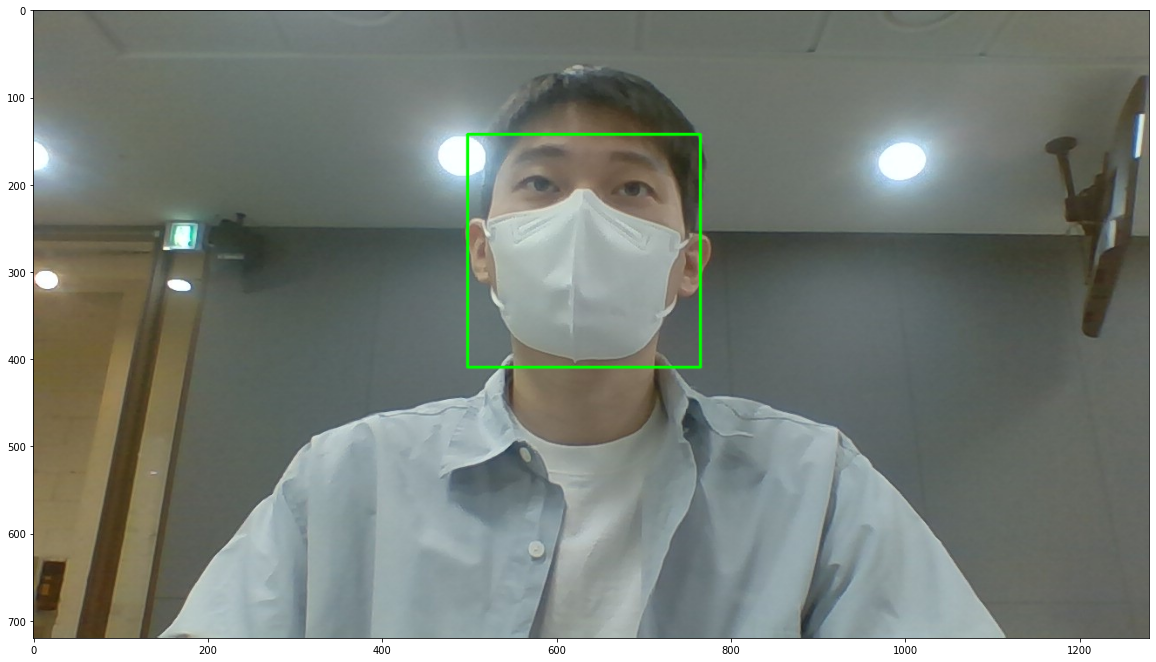

In [859]:
# 얼굴 검출 영역 시각화
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()

In [860]:
# face landmark 모델 설정 
landmark_path = '/content/drive/MyDrive/AIFFEL/Exp/08/data/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(landmark_path)

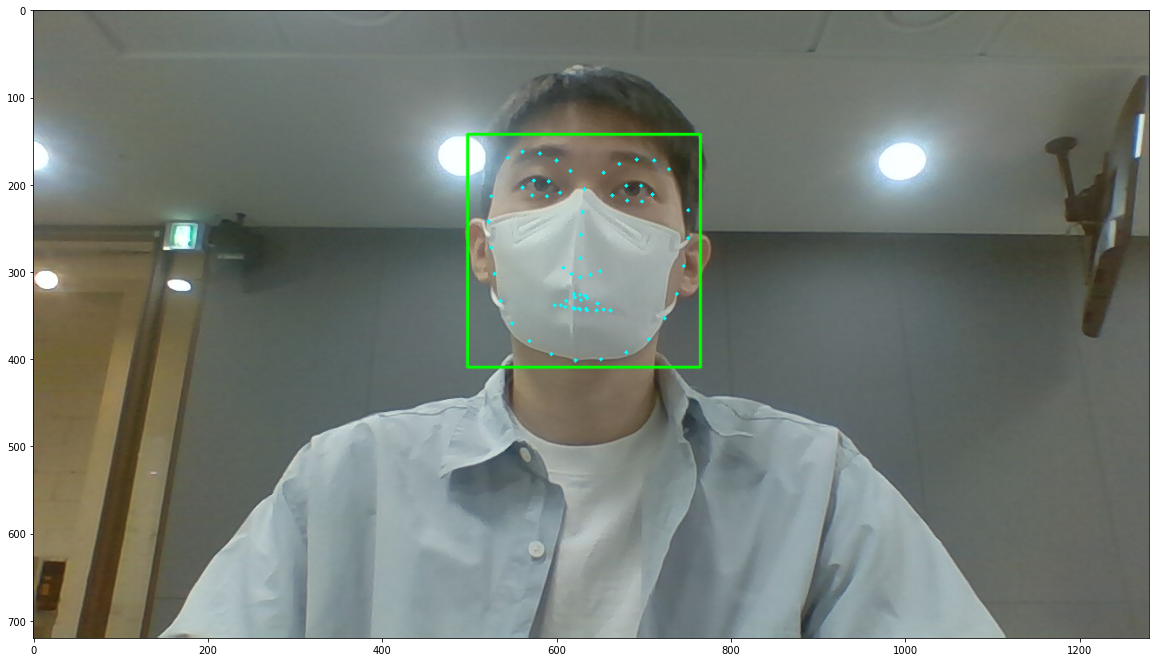

In [861]:
list_landmarks = []

# 검출된 얼굴 영역 각각에 대해 landmark 추출
for dlib_rect in dlib_rects:
    points = landmark_predictor(img, dlib_rect)
    # face landmark 좌표
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img, point, 2, (0, 255, 255), -1)

plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()



### Step 3. 스티커 적용 위치 확인하기



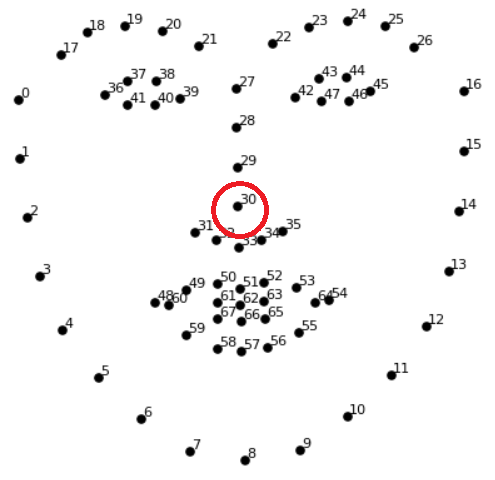

--> '30'으로 결정



### Step 4. 스티커 적용하기



In [862]:
# 스티커 크기 계산
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()

sticker = cv2.imread(sticker_path) # 스티커 이미지 불러오기
sticker = cv2.resize(sticker, (w,h)) # 스티커 크기 설정
print (sticker.shape)

(268, 268, 3)


In [863]:
refined_x = x - w // 2
refined_y = y - w // 2

if refined_x < 0: 
    sticker = sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    sticker = sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (493,150)


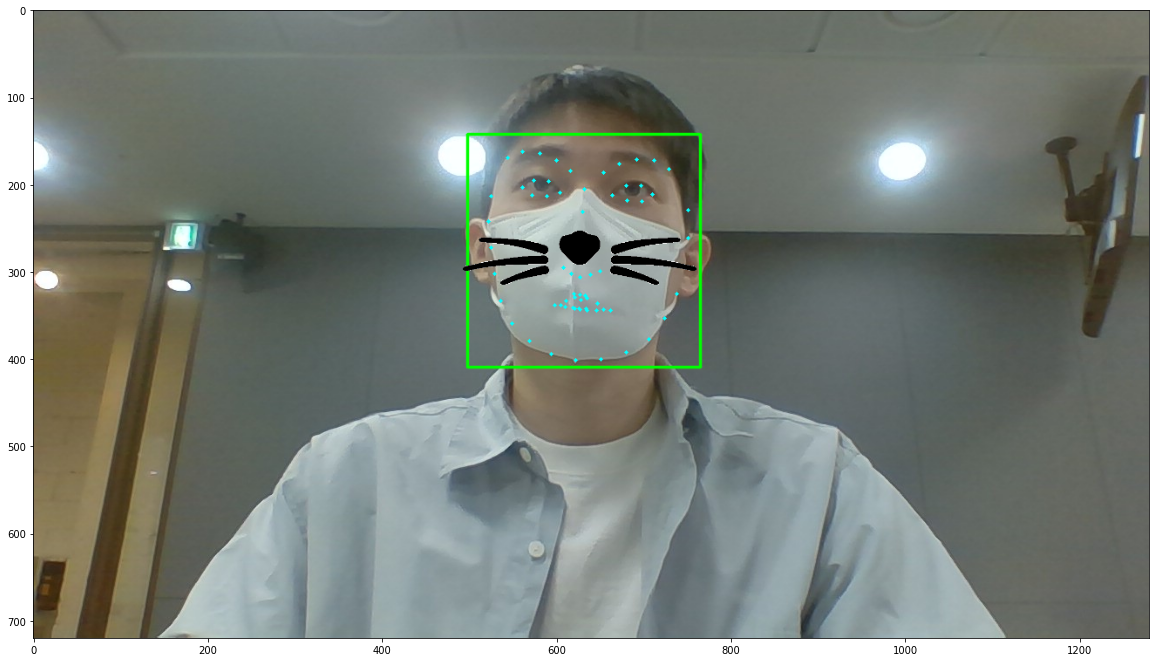

In [864]:
sticker_area = img[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]]
# 스티커 삽입
img[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]] = \
    np.where(sticker==255,sticker_area,sticker).astype(np.uint8)

plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()

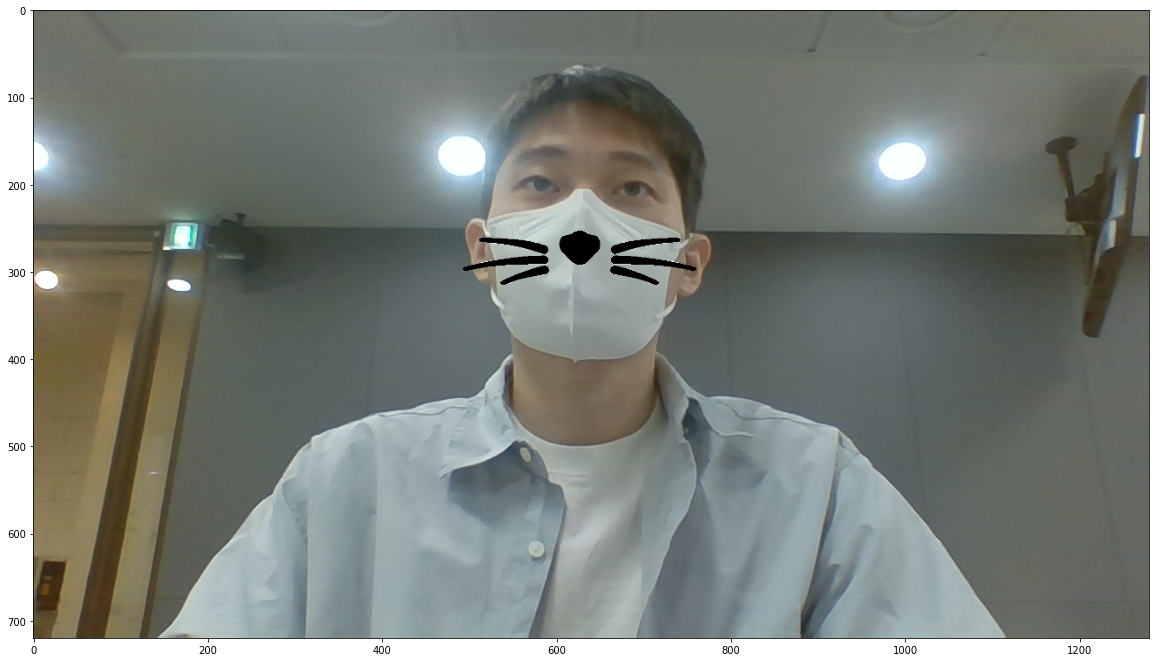

In [865]:
sticker_area = img_show[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]]
# 출력용 이미지 적용
img_show[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]] = \
    np.where(sticker==255,sticker_area,sticker).astype(np.uint8)

plt.figure(figsize=(20,20))
plt.imshow(img_show)
plt.show()



### Step 5. 문제점 찾아보기



(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

▶ '옆 모습' 얼굴 인식 실패 사례 1

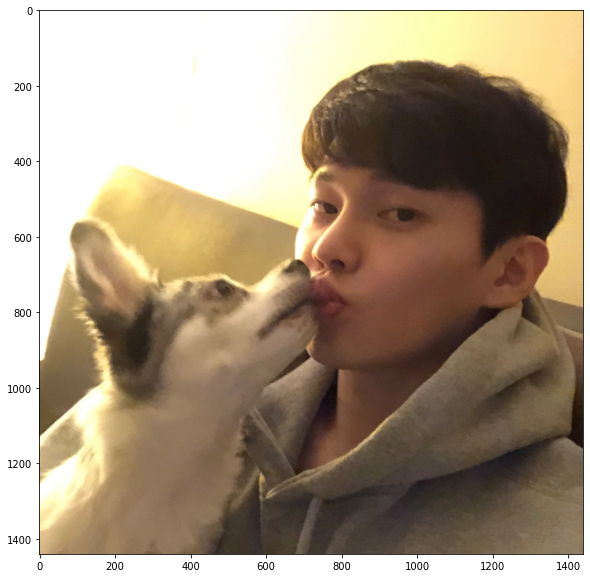

In [866]:
img_path = '/content/drive/MyDrive/AIFFEL/Exp/08/data/gujji.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_show = img.copy()      # 출력용 이미지를 따로 보관합니다

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [867]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img, 1)

print(dlib_rects)   

rectangles[]


▶ '옆 모습' 얼굴 인식 실패 사례 2

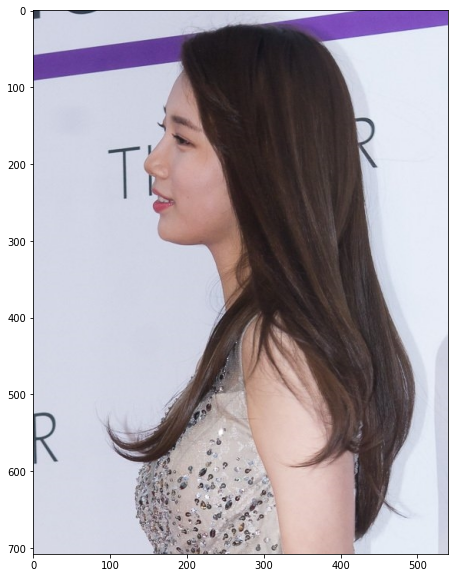

In [868]:
img_path = '/content/drive/MyDrive/AIFFEL/Exp/08/data/suzy.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_show = img.copy()      # 출력용 이미지를 따로 보관합니다

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [869]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img, 1)

print(dlib_rects)  

rectangles[]


▶ '옆 모습' 얼굴 인식 성공 사례

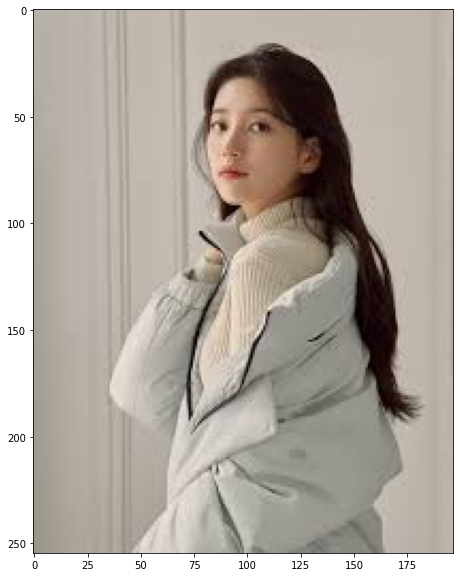

In [870]:
img_path = '/content/drive/MyDrive/AIFFEL/Exp/08/data/suzy2.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_show = img.copy()      # 출력용 이미지 백업

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [871]:
# 얼굴 검출
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img, 1)

print(dlib_rects) 

rectangles[[(72, 38) (124, 90)]]


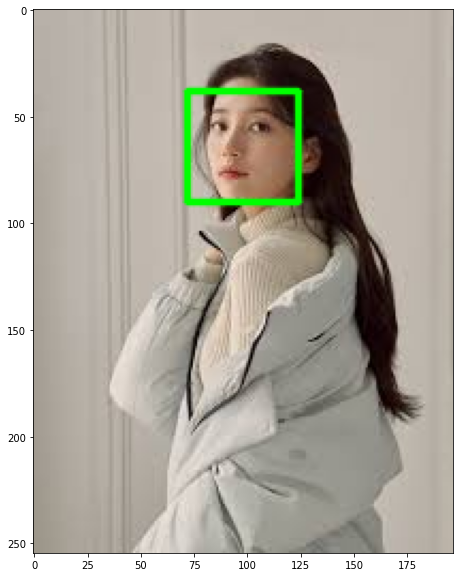

In [872]:
# 얼굴 검출 영역 시각화
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

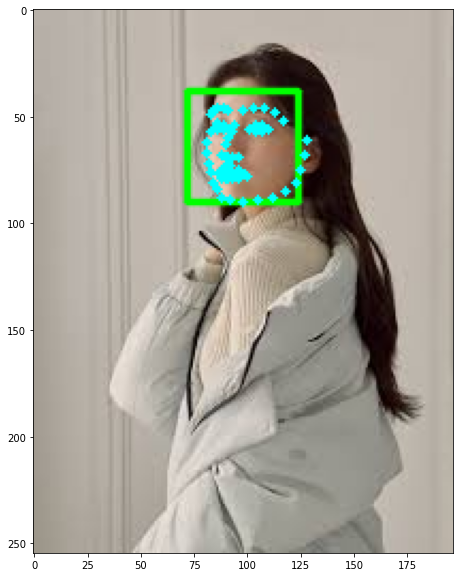

In [873]:
list_landmarks = []

# 검출된 얼굴 영역 각각에 대해 landmark 추출
for dlib_rect in dlib_rects:
    points = landmark_predictor(img, dlib_rect)
    # face landmark 좌표
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img, point, 2, (0, 255, 255), -1)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [874]:
# 스티커 크기 계산
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(90, 63)
(x,y) : (90,37)
(w,h) : (53,53)


In [875]:
sticker = cv2.imread(sticker_path) # 스티커 이미지 불러오기
sticker = cv2.resize(sticker, (w,h)) # 스티커 크기 설정
print (sticker.shape)

(53, 53, 3)


In [876]:
refined_x = x - w // 2
refined_y = y

if refined_x < 0: 
    sticker = sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    sticker = sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (64,37)


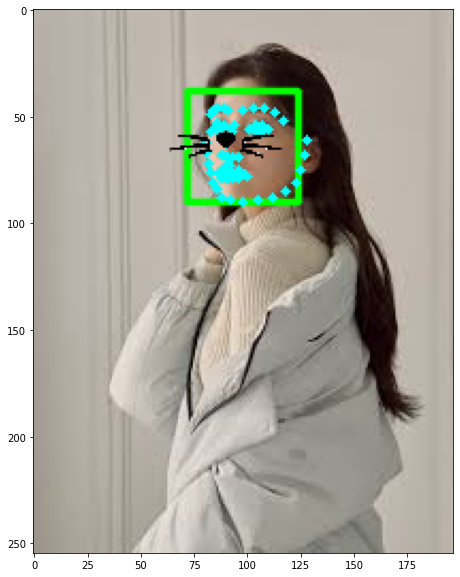

In [877]:
sticker_area = img[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]]
# 스티커 삽입
img[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]] = \
    np.where(sticker==255,sticker_area,sticker).astype(np.uint8)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

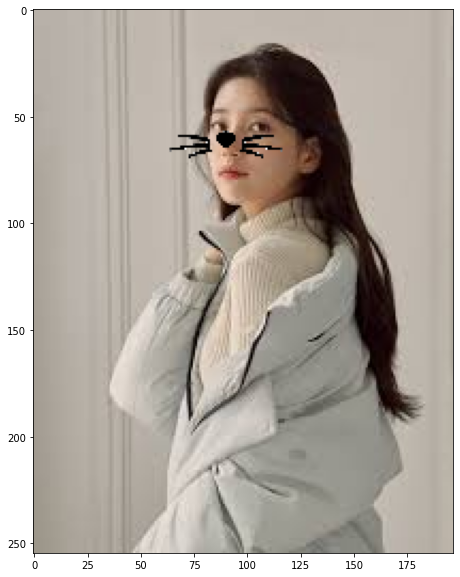

In [878]:
sticker_area = img_show[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]]
# 출력용 이미지 적용
img_show[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]] = \
    np.where(sticker==255,sticker_area,sticker).astype(np.uint8)

plt.figure(figsize=(10,10))
plt.imshow(img_show)
plt.show()

▶ 이미지 내 다수의 얼굴에 대해 스티커 붙이기

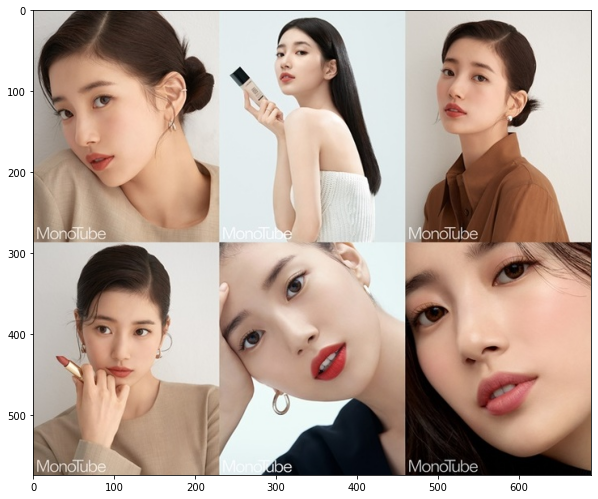

In [879]:
img_path = '/content/drive/MyDrive/AIFFEL/Exp/08/data/suzys.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_show = img.copy()      # 출력용 이미지 백업

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [880]:
# 얼굴 검출
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img, 1)

print(dlib_rects) 

rectangles[[(278, 30) (353, 105)], [(474, 44) (581, 152)], [(55, 367) (163, 474)], [(-22, 64) (150, 219)], [(305, 318) (341, 354)]]


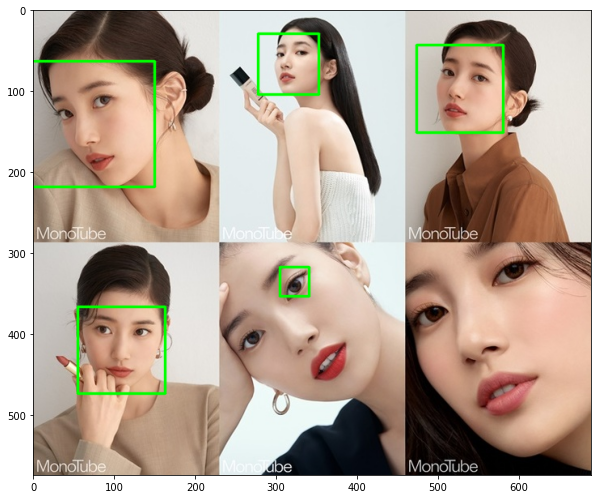

In [881]:
# 얼굴 검출 영역 시각화
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

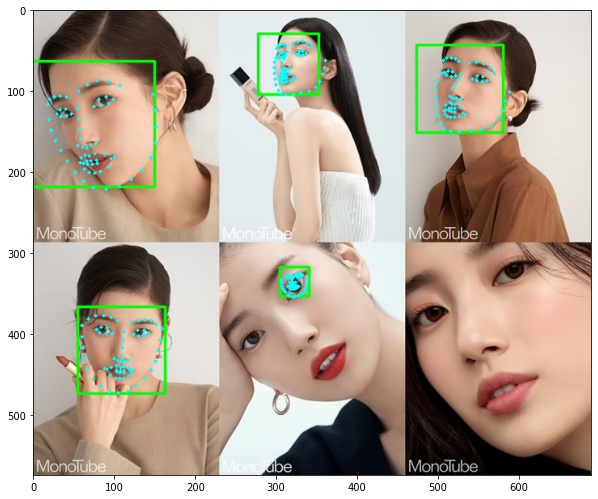

In [882]:
list_landmarks = []

# 검출된 얼굴 영역 각각에 대해 landmark 추출
for dlib_rect in dlib_rects:
    points = landmark_predictor(img, dlib_rect)
    # face landmark 좌표
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img, point, 2, (0, 255, 255), -1)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [883]:
def sticker_people(img, list_face, list_landmarks):
     
    x = []
    y = []
    w_h = []
    
    for i ,(dlib_rect, landmark) in enumerate(zip(list_face, list_landmarks)): 
        x.append(landmark[30][0]) # 스티커 x좌표
        y.append(landmark[30][1]) # 스티커 y좌표
        w_h.append(dlib_rect.width()) # 스티커 너비(=높이)

    for i, _ in enumerate(list_face):
        sticker = cv2.imread(sticker_path)
        sticker = cv2.resize(sticker, (w_h[i], w_h[i]))

        refined_x = x[i] - w_h[i] // 2
        refined_y = y[i] - w_h[i] // 2
    
        # 이미지가 영역를 넘어갔을 경우 예외처리
        if refined_x < 0: 
            sticker = sticker[:, -refined_x:]
            refined_x = 0
        if refined_y < 0:
            sticker = sticker[-refined_y:, :]
            refined_y = 0

        sticker_area = img_show[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]]

        img_show[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]] = \
            np.where(sticker==255,sticker_area,sticker).astype(np.uint8)
    
    plt.figure(figsize=(10,10))
    plt.imshow(img_show)
    plt.show()

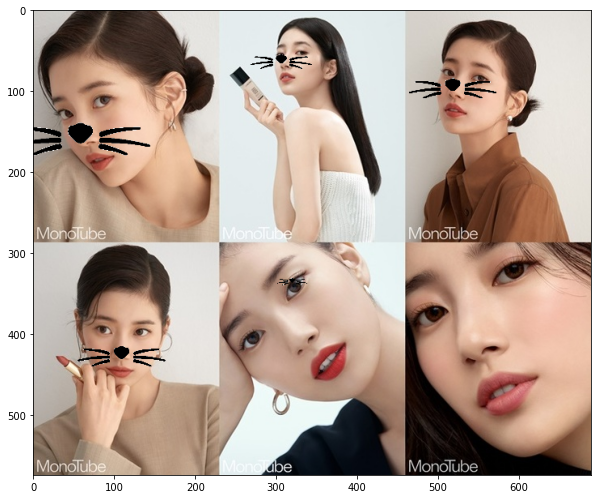

In [884]:
sticker_people(img, dlib_rects, list_landmarks)

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!



본 프로젝트는 얼굴 검출에서부터 모든 것이 시작된다. 따라서 얼굴 검출에 실패할 경우 이후의 프로세스를 진행할 수가 없다. 그러나 dlib의 get_frontal_face_detector()는 이름대로 정면의 얼굴에 대해서만 정상적인 추론을 한다. 즉, 얼굴의 각도가 틀어져 '옆 모습'에 가까워질 수록 검출 확률이 떨어진다. 심지어 정면의 얼굴이라 하더라도 프레임에 꽉 찰 정도로 크거나 반대로 아주 작을 경우에도 제대로 검출하지 못한다.



---



### 회고



만약에 '다양한 각도', 다시 말하면, 단순히 정면의 얼굴 이미지를 회전시킨 것이 아닌, 얼굴이라는 공간 안에서 이목구비의 좌표가 (정면일 때와 비교했을 때) 달라지는 경우에도 검출 가능한 모델을 사용했다면, 스티커 이미지 역시 다양한 각도에 따라 회전이 가능해야 한다. 또한 여기서 회전은 평면에서만 이루어지는 것이 아닌 3차원상의 '깊이'의 개념이 포함된 것이라면 더욱 좋을 것이다. 다음 프로젝트에선 이런 부분들을 구현해보고 싶다.